* Student name: Angela Joseph-Pauline
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Joel Collins
* Blog post URL: N/A


  ## Exploring Data in order to find the best indicators that will help find predictors in price increases of Houses in Kings County, WA. 
   ## Data Exploration- linear regression model review.
   
   ### Start with importing needed data and libraries   

In [6]:
# import need libraries 
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [9]:
# import data
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [11]:
# explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [12]:
# check to see if there null values
print(df.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [13]:
# drop null values
df = df.dropna()
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


### Check individual feature correlation with the price

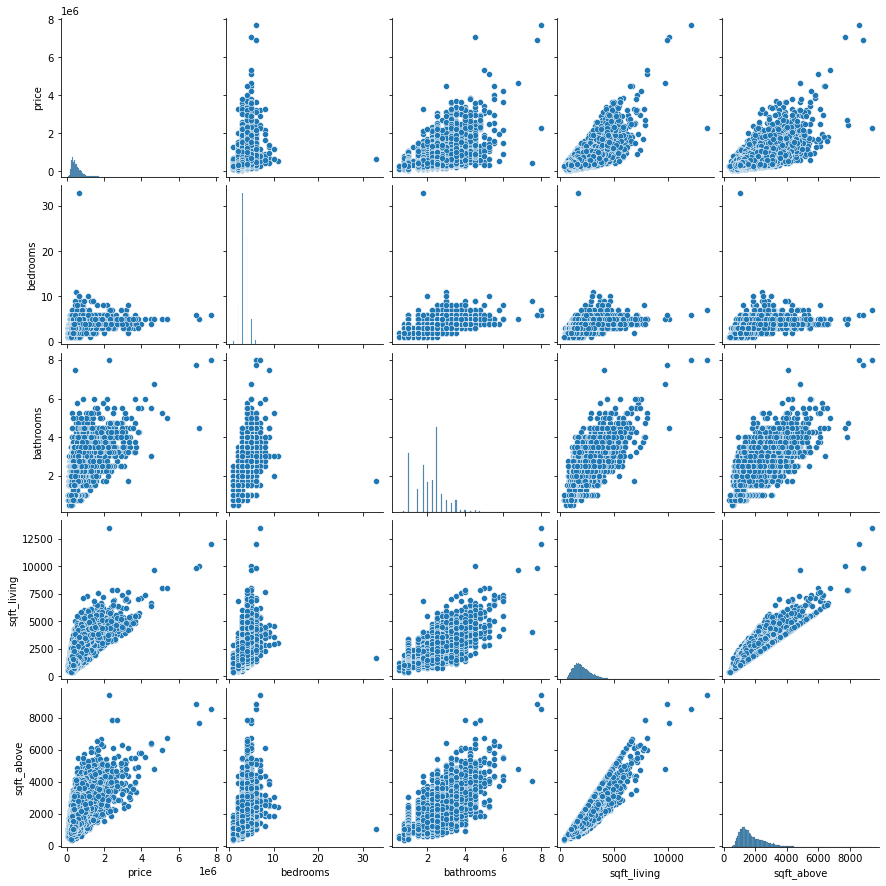

In [14]:
# Visualize linear relationships
fmc_colmns= ['price','bedrooms','bathrooms','sqft_living','sqft_above']
fmc_df= df[fmc_colmns]
sns.pairplot(fmc_df);

 The most linear relationship, in relation to price, that I can see in these projections seem to be square footage in living space. 

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

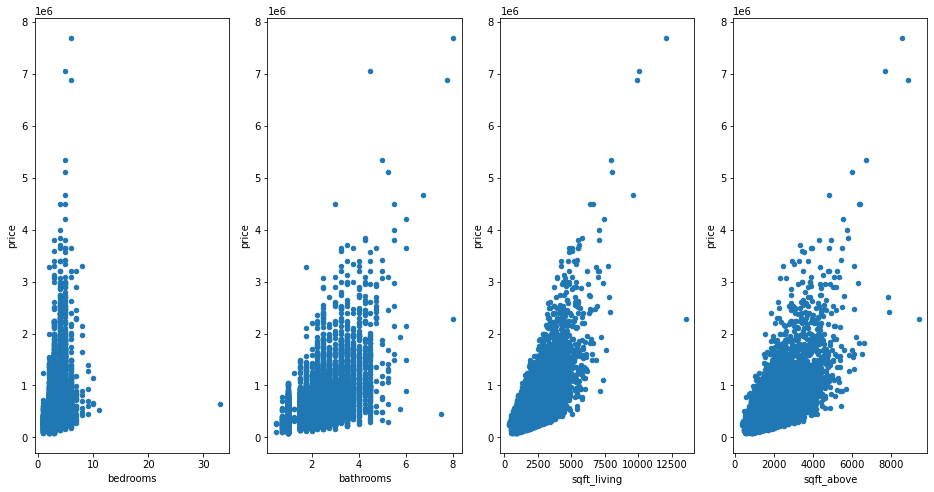

In [15]:
# narrow down visualizations 
fig, axs = plt.subplots(1, 4,)
df.plot(kind='scatter', x='bedrooms', y='price', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='bathrooms', y='price', ax=axs[1])
df.plot(kind='scatter', x='sqft_living', y='price', ax=axs[2])
df.plot(kind='scatter', x='sqft_above', y='price', ax=axs[3])

 A closer look of the four most apealing graphs confirms the above obnservation that Square footage in living space has the most linear looking relationship.

### run a linear regression model with available data

In [16]:
f = 'price ~ bathrooms + bedrooms + sqft_living + sqft_above'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     4168.
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:29:31   Log-Likelihood:            -2.1886e+05
No. Observations:               15762   AIC:                         4.377e+05
Df Residuals:                   15757   BIC:                         4.378e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.265e+04   8206.609      8.852      0.000    5.66e+04    8.87e+04
bathrooms    8110.7371   4166.078      1.947      0.052     -55.253    1.63e+04
bedrooms    -6.067e+04   2737.892    -22.159      0.000    -6.6e+04   -5.53e+04
sqft_living   333.9954      5.412     61.711      0.000     323.387     344.604
sqft_above    -22.1724      5.212     -4.254      0.000     -32.388     -11.956
==============================================================================
Omnibus:                    10803.579   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           409202.836
Skew:                           2.805   Prob(JB):                         0.00
Kurtosis:                      27.323   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After seeing that the R- squared is in the 500s I was curious to see how square footage factered alone. 

In [17]:
f = 'price ~  sqft_living '
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.568e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:29:31   Log-Likelihood:            -2.1911e+05
No. Observations:               15762   AIC:                         4.382e+05
Df Residuals:                   15760   BIC:                         4.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.516e+04   5205.744    -10.597      0.000   -6.54e+04    -4.5e+04
sqft_living   286.1494      2.285    125.214      0.000     281.670     290.629
==============================================================================
Omnibus:                    11136.965   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           457340.013
Skew:                           2.910   Prob(JB):                         0.00
Kurtosis:                      28.739   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Alone Square footage had an R-sqared of 0.499

### check linearity with rainbow test.

In [18]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0351700164286886
Rainbow p-value: 0.0625027987839226


I am unable to reject the hypothesis because the p-value is slightly higher then significant. 

In [19]:
y = fmc_df['price']
y_hat = model.predict()

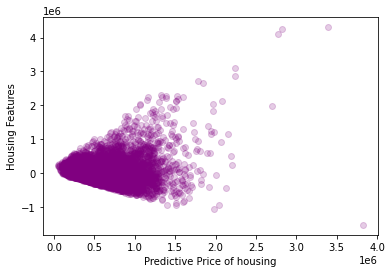

In [20]:
fig3, ax2 = plt.subplots()
ax2.set(xlabel="Predictive Price of housing",
        ylabel="Housing Features")
ax2.scatter(x=y_hat, y=y-y_hat, color="purple", alpha=0.2);

# 

In [21]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y_hat-y, fmc_df[['bedrooms']])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 1.248822923498652e-157


# 

### Import crime data set and clean new data set

In [22]:
df_crime = pd.read_csv("data/King_County_Sheriff_s_Office_-_Incident_Dataset-Copy1.csv")
df_crime.head()

,case_number,incident_datetime,incident_type,FCR,address_1,city,state,zip,created_at,updated_at,hour_of_day,day_of_week,Incident Block Location
0,C19045456,11/27/2019 02:10:00 PM,Other,377,8700 Block 250TH AVE NE,REDMOND,WA,98053,12/02/2019 11:55:00 PM,12/03/2019 01:47:00 AM,14,Wednesday,POINT (-122.00566700000002 47.679241)
1,C19045392,11/27/2019 08:00:00 AM,Traffic,427,BECKLER RD & MP 4.6,SKYKOMISH,WA,98288,12/02/2019 10:25:00 PM,12/03/2019 12:16:00 AM,8,Wednesday,NaN
2,C19047596,11/20/2019 11:38:00 AM,Property Crime,331,NFD 6028 & HWY 2,BARING,WA,5474,12/17/2019 11:15:00 PM,12/17/2019 11:56:00 PM,11,Wednesday,NaN
3,C19044352,11/19/2019 02:38:00 PM,Drugs,200,1 Block AVE S & S KING ST,SEATTLE,WA,98144,12/02/2019 05:05:00 PM,12/02/2019 06:56:00 PM,14,Tuesday,NaN
4,C19044243,11/18/2019 11:06:00 PM,Traffic,404,I,KENT,WA,NaN,11/26/2019 08:55:00 PM,11/26/2019 10:46:00 PM,23,Monday,NaN


In [23]:
# make sure city names are all unique
kc_cities= df_crime['city'].unique()
kc_cities

array(['REDMOND', 'SKYKOMISH', 'BARING', 'SEATTLE', 'KENT', 'AUBURN',
       'WOODINVILLE', 'SNOQUALMIE', 'SEATAC', 'VASHON', 'RENTON',
       'CENTRALIA', 'TUKWILA', 'NORTH BEND', 'MAPLE VALLEY', 'PUYALLUP',
       'FALL CITY', 'ISSAQUAH', 'YAKIMA', 'COVINGTON', 'EVERETT',
       'SAMMAMISH', 'ENUMCLAW', 'BURIEN', 'WHITE CENTER', 'NEWCASTLE',
       'CARNATION', 'SHORELINE', 'KING COUNTY', 'BLACK DIAMOND',
       'RAVENSDALE', 'COTTAGE LAKE', 'FEDERAL WAY', 'BRYN MAWR-SKYWAY',
       'DUVALL', 'BELLEVUE', 'KENMORE', 'DES MOINES', 'SOQUALMIE',
       'TACOMA', 'KOKOMO', 'STANWOOD', 'SKYWAY', 'BONNEY LAKE',
       'EAST HILL-MERIDIAN', 'ENCUMCLAW', 'PACIFIC',
       'LAKE MORTON-BERRYDALE', 'EAST RENTON HIGHLANDS', 'NORTHBEND',
       'SPANAWAY', 'LAKELAND SOUTH', 'TANNER', 'GOLD BAR',
       'LAKELAND NORTH', 'VANCOUVER', 'UNIVERSITY PLACE', 'LUBBOCK',
       'MIRRORMONT', 'SNOHOMISH', 'BREMERTON', 'LYNNWOOD', 'LAKEWOOD',
       'BOTHELL', 'ALGONA', 'HOBART', 'ABERDEEN', 'CASCADE-FAIRW

In [24]:
# change city names case
df_crime['city']= df_crime['city'].str.title()
df_crime['city']

0          Redmond
1        Skykomish
2           Baring
3          Seattle
4             Kent
           ...    
20444       Auburn
20445       Vashon
20446         Kent
20447    Fall City
20448       Renton
Name: city, Length: 20449, dtype: object

In [25]:
# explore data to see what is needed
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20449 entries, 0 to 20448
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   case_number              20449 non-null  object
 1   incident_datetime        20449 non-null  object
 2   incident_type            20449 non-null  object
 3   FCR                      20449 non-null  int64 
 4   address_1                20449 non-null  object
 5   city                     20449 non-null  object
 6   state                    20449 non-null  object
 7   zip                      20133 non-null  object
 8   created_at               20449 non-null  object
 9   updated_at               20449 non-null  object
 10  hour_of_day              20449 non-null  int64 
 11  day_of_week              20449 non-null  object
 12  Incident Block Location  17713 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.0+ MB


In [26]:
# remove unneeded data
df_crime= df_crime.drop(columns=['case_number', 'incident_datetime', 'FCR', 'created_at', 'updated_at', 
                                  'hour_of_day', 'day_of_week', 'Incident Block Location'])
df_crime.head()

,incident_type,address_1,city,state,zip
0,Other,8700 Block 250TH AVE NE,Redmond,WA,98053
1,Traffic,BECKLER RD & MP 4.6,Skykomish,WA,98288
2,Property Crime,NFD 6028 & HWY 2,Baring,WA,5474
3,Drugs,1 Block AVE S & S KING ST,Seattle,WA,98144
4,Traffic,I,Kent,WA,NaN


In [27]:
# rename zip code in order to combine data sets easier
df_crime = df_crime.rename(columns={'zip': 'zipcode','incident_type': 'crime' }, inplace= False)
df_crime.columns

Index(['crime', 'address_1', 'city', 'state', 'zipcode'], dtype='object')

In [28]:
# check for null values
print(df_crime.isnull().sum())

crime          0
address_1      0
city           0
state          0
zipcode      316
dtype: int64


In [29]:
# remove null values
df_crime = df_crime.dropna()
print(df_crime.isnull().sum())

crime        0
address_1    0
city         0
state        0
zipcode      0
dtype: int64


In [30]:
# check for duplicates
duplicate_rows_df_crime = df_crime[df_crime.duplicated()]
print('The ratio of duplicates to rows is as follows:', duplicate_rows_df_crime.shape)

The ratio of duplicates to rows is as follows: (6070, 5)


In [31]:
# check that duplication worked
duplicate_rows_df_crime = df_crime[df_crime.duplicated()]
print('The ratio of duplicates to rows is as follows:', duplicate_rows_df_crime.shape)

The ratio of duplicates to rows is as follows: (6070, 5)


In [32]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20133 entries, 0 to 20448
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   crime      20133 non-null  object
 1   address_1  20133 non-null  object
 2   city       20133 non-null  object
 3   state      20133 non-null  object
 4   zipcode    20133 non-null  object
dtypes: object(5)
memory usage: 943.7+ KB


In [35]:
dc= df_crime[['crime']].groupby(['crime']).agg('sum')
dc

""
crime
Arson
Assault
Assault with Deadly Weapon
Breaking & Entering
Community Policing
Death
Disorder
Drugs
Fire


In [37]:
dc['crime_amount']= df_crime[['crime']].groupby(['crime']).size()
dc

,crime_amount
crime,
Arson,81
Assault,1568
Assault with Deadly Weapon,59
Breaking & Entering,1239
Community Policing,449
Death,434
Disorder,272
Drugs,465
Fire,207


In [48]:
dc['crime_amount_avg']= dc[['crime_amount']].mean(axis=1)
dc

,crime_amount,crime_amount_avg
crime,,
Arson,81,81.0
Assault,1568,1568.0
Assault with Deadly Weapon,59,59.0
Breaking & Entering,1239,1239.0
Community Policing,449,449.0
Death,434,434.0
Disorder,272,272.0
Drugs,465,465.0
Fire,207,207.0


In [49]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, Arson to Weapons Offense
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   crime_amount      24 non-null     int64  
 1   crime_amount_avg  24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 576.0+ bytes


In [50]:
df_cm= df_crime.join(dc, on='crime')
df_cm

,crime,address_1,city,state,zipcode,crime_amount,crime_amount_avg
0,Other,8700 Block 250TH AVE NE,Redmond,WA,98053,6786,6786.0
1,Traffic,BECKLER RD & MP 4.6,Skykomish,WA,98288,696,696.0
2,Property Crime,NFD 6028 & HWY 2,Baring,WA,5474,2271,2271.0
3,Drugs,1 Block AVE S & S KING ST,Seattle,WA,98144,465,465.0
5,Other,1 Block AVE & COLUMBIA ST,Seattle,WA,98104,6786,6786.0
...,...,...,...,...,...,...,...
20444,Other,1100 Block 25TH ST SE,Auburn,WA,98002,6786,6786.0
20445,Assault,10800 Block VASHON HWY SW,Vashon,WA,98070,1568,1568.0
20446,Theft from Vehicle,26400 Block 94TH PL S,Kent,WA,98030,1241,1241.0
20447,Property Crime,36700 Block SE DAVID POWELL RD,Fall City,WA,98024,2271,2271.0


#### model new elements into the housing data

In [51]:
# Check if the column zipcode are the same type inorder to merge
print('Housing:', df.zipcode.dtype)
print('Crime:', df_cm.zipcode.dtype)

Housing: object
Crime: object


In [52]:
#change one to the type needed
df.zipcode = df.zipcode.astype(str)

In [53]:
# merge
df_merged = df.merge(df_cm, on='zipcode').drop_duplicates(subset=['id'])

In [54]:
# take out extra spaces to make working with df easier
df_merged = df_merged.replace(" ","")
df_merged.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,crime,address_1,city,state,crime_amount,crime_amount_avg
0,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,Other,10200 Block 1ST AVE NE,Seattle,WA,6786,6786.0
85,8820901275,6/10/2014,571000.0,4,2.00,2750,7807,1.5,0.0,0.0,...,47.7168,-122.287,1510,7807,Other,10200 Block 1ST AVE NE,Seattle,WA,6786,6786.0
170,1133000671,6/2/2014,315000.0,3,1.00,960,6634,1.0,0.0,0.0,...,47.7264,-122.310,1570,7203,Other,10200 Block 1ST AVE NE,Seattle,WA,6786,6786.0
255,3992700335,7/7/2014,382500.0,2,1.00,1190,4440,1.0,0.0,0.0,...,47.7135,-122.287,1060,5715,Other,10200 Block 1ST AVE NE,Seattle,WA,6786,6786.0
340,6414100671,9/9/2014,425000.0,3,1.75,2500,6840,1.0,0.0,0.0,...,47.7222,-122.320,1580,8691,Other,10200 Block 1ST AVE NE,Seattle,WA,6786,6786.0


In [55]:
# model new data
f = 'price ~  sqft_living + crime_amount_avg'
model_two = ols(formula=f, data=df_merged).fit()
model_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     7673.
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:31:54   Log-Likelihood:            -2.1694e+05
No. Observations:               15640   AIC:                         4.339e+05
Df Residuals:                   15637   BIC:                         4.339e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.108e+04   5782.391     -8.834      0.000   -6.24e+04   -3.97e+04
sqft_living        277.7741      2.243    123.851      0.000     273.378     282.170
crime_amount_avg     2.7723      0.712      3.896      0.000       1.377       4.167
==============================================================================
Omnibus:                    10824.944   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           428738.904
Skew:                           2.831   Prob(JB):                         0.00
Kurtosis:                      28.017   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is a slight jump in the R-squared but it is not much of a change. There are probably other changes that could be made that could help just the R-squared. Side note- Interestingly enough people are more likely to move into an area that has breaking and entering then any of the other crimes. 

In [56]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model_two)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 0.5829035888127383
Rainbow p-value: 0.9999999999999999


There is a big jump in the P- value. It seems that I am not able to reject the null hypothesis with the addition of the crime data. 

In [57]:
y = df_merged['price']
y_hat = model_two.predict()

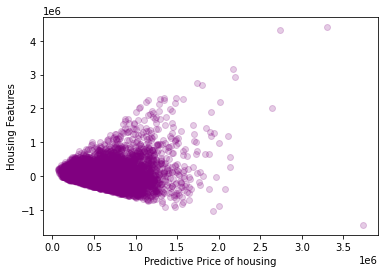

In [58]:
fig3, ax2 = plt.subplots()
ax2.set(xlabel="Predictive Price of housing",
        ylabel="Housing Features")
ax2.scatter(x=y_hat, y=y-y_hat, color="purple", alpha=0.2);

# 

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
df_model2 = df_merged[['crime_amount_avg','sqft_living']]

In [61]:
rows = df_model2[['crime_amount_avg', 'sqft_living']].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(2)]
vif_df["price"] = ['crime_amount','sqft_living']

vif_df

,VIF,price
0,2.112753,crime_amount
1,2.112753,sqft_living


The variance inflation factor found that there aren't any multicollinearity problems at the moment.

### Import and clean a new set of data

In [62]:
df_landmarks = pd.read_csv("Common_Points_of_Interest_for_King_County____common_interest_point (1).csv")
df_landmarks.head()

,X,Y,OBJECTID,FEATURE_ID,ESITE,CODE,NAME,ABB_NAME,ADDRESS,ZIPCODE
0,1.266129e+06,217679.600855,1,6300018,763612.0,630,Pier/Terminals 8-18,Pier/Terminals 8 - 18,2400 11th Ave SW,98134
1,1.280136e+06,274175.280843,2,351058,0.0,350,Briarcrest School Elementary,Briarcrest School Elementary,2715 NE 158TH ST,98155
2,1.323739e+06,178969.913511,3,351059,0.0,350,Briarwood Elementary School,Briarwood Elementary,17020 SE 134TH ST,98059
3,1.316343e+06,283405.542238,4,351061,0.0,350,Brick Wood Fired Pizza @ Callahan Cellars,Brick Wood Fired Pizza,19501 144th AVE NE STE D900,98072
4,1.276469e+06,128580.310550,5,351062,0.0,350,Brickyard Pub,Brickyard Pub,28845 MILITARY RD S,98003


In [63]:
# initial exploration of data
df_landmarks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6491 entries, 0 to 6490
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           6491 non-null   float64
 1   Y           6491 non-null   float64
 2   OBJECTID    6491 non-null   int64  
 3   FEATURE_ID  6491 non-null   int64  
 4   ESITE       6484 non-null   float64
 5   CODE        6491 non-null   int64  
 6   NAME        6491 non-null   object 
 7   ABB_NAME    6491 non-null   object 
 8   ADDRESS     6489 non-null   object 
 9   ZIPCODE     6491 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 507.2+ KB


In [64]:
df_landmarks.columns

Index(['X', 'Y', 'OBJECTID', 'FEATURE_ID', 'ESITE', 'CODE', 'NAME', 'ABB_NAME',
       'ADDRESS', 'ZIPCODE'],
      dtype='object')

In [65]:
# Replace any unwanted spaces
df_landmarks = df_landmarks.replace(" ","")
df_landmarks.head()

,X,Y,OBJECTID,FEATURE_ID,ESITE,CODE,NAME,ABB_NAME,ADDRESS,ZIPCODE
0,1.266129e+06,217679.600855,1,6300018,763612.0,630,Pier/Terminals 8-18,Pier/Terminals 8 - 18,2400 11th Ave SW,98134
1,1.280136e+06,274175.280843,2,351058,0.0,350,Briarcrest School Elementary,Briarcrest School Elementary,2715 NE 158TH ST,98155
2,1.323739e+06,178969.913511,3,351059,0.0,350,Briarwood Elementary School,Briarwood Elementary,17020 SE 134TH ST,98059
3,1.316343e+06,283405.542238,4,351061,0.0,350,Brick Wood Fired Pizza @ Callahan Cellars,Brick Wood Fired Pizza,19501 144th AVE NE STE D900,98072
4,1.276469e+06,128580.310550,5,351062,0.0,350,Brickyard Pub,Brickyard Pub,28845 MILITARY RD S,98003


In [66]:
#remove unneedws columns
df_landmarks= df_landmarks.drop(columns=['X', 'Y', 'OBJECTID', 'FEATURE_ID', 
                                  'ESITE', 'CODE', 'ABB_NAME'])
df_landmarks.head()

,NAME,ADDRESS,ZIPCODE
0,Pier/Terminals 8-18,2400 11th Ave SW,98134
1,Briarcrest School Elementary,2715 NE 158TH ST,98155
2,Briarwood Elementary School,17020 SE 134TH ST,98059
3,Brick Wood Fired Pizza @ Callahan Cellars,19501 144th AVE NE STE D900,98072
4,Brickyard Pub,28845 MILITARY RD S,98003


In [67]:
# re-name columns to make data easier to work with
df_landmarks = df_landmarks.rename(columns={'NAME': 'landmarks', 'ADDRESS': 'address', 'ZIPCODE': 'zipcode'}, inplace= False)
df_landmarks.columns

Index(['landmarks', 'address', 'zipcode'], dtype='object')

### work the data into a numerical sum to make evaluations later on easier

In [68]:
dl= df_landmarks[['landmarks']].groupby(['landmarks']).agg('sum')
dl

""
landmarks
110 Union Bldg
1111 3rd Ave Bldg
1201 Western Bldg
12th Ave Bicycles and Collectables
12th West & West Howe Park
...
York Playground
Zenith Park
Zoka Coffee Roaster @ Amazon Bon Appetit


In [69]:
dl['landmark_place_count']= df_landmarks['landmarks'].value_counts()
dl

,landmark_place_count
landmarks,
110 Union Bldg,1
1111 3rd Ave Bldg,1
1201 Western Bldg,1
12th Ave Bicycles and Collectables,1
12th West & West Howe Park,1
...,...
York Playground,1
Zenith Park,1
Zoka Coffee Roaster @ Amazon Bon Appetit,1


In [70]:
# join into one chart so it can merged into original dataframe
df_landmark= df_landmarks.join(dl, on='landmarks')
df_landmark

,landmarks,address,zipcode,landmark_place_count
0,Pier/Terminals 8-18,2400 11th Ave SW,98134,1
1,Briarcrest School Elementary,2715 NE 158TH ST,98155,1
2,Briarwood Elementary School,17020 SE 134TH ST,98059,2
3,Brick Wood Fired Pizza @ Callahan Cellars,19501 144th AVE NE STE D900,98072,1
4,Brickyard Pub,28845 MILITARY RD S,98003,1
...,...,...,...,...
6486,Titus Railroad Park,1st Ave N & W Titus St,98054,1
6487,North East Library,6801 35th Ave NE,98115,1
6488,Emerald Downs,2300 Emerald Downs Dr,98001,1
6489,SeaTac Municipal Court,4800 S 188th St,98188,1


In [71]:
# make sure columns are compatible
print('Housing:', df_merged.zipcode.dtype)
print('Landmark:', df_landmark.zipcode.dtype)

Housing: object
Landmark: int64


In [72]:
df_landmark.zipcode = df_landmark.zipcode.astype(str)

### Merge new data and run new model

In [73]:
df_newnew = df_merged.merge(df_landmark, on='zipcode').drop_duplicates(subset=['id'])
df_newnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15640 entries, 0 to 1234928
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15640 non-null  int64  
 1   date                  15640 non-null  object 
 2   price                 15640 non-null  float64
 3   bedrooms              15640 non-null  int64  
 4   bathrooms             15640 non-null  float64
 5   sqft_living           15640 non-null  int64  
 6   sqft_lot              15640 non-null  int64  
 7   floors                15640 non-null  float64
 8   waterfront            15640 non-null  float64
 9   view                  15640 non-null  float64
 10  condition             15640 non-null  int64  
 11  grade                 15640 non-null  int64  
 12  sqft_above            15640 non-null  int64  
 13  sqft_basement         15640 non-null  object 
 14  yr_built              15640 non-null  int64  
 15  yr_renovated     

In [74]:
df_newnew = df_newnew.replace(" ","")
df_newnew.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,crime,address_1,city,state,crime_amount,crime_amount_avg,landmarks,address,landmark_place_count
0,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7639,Other,10200 Block 1ST AVE NE,Seattle,WA,6786,6786.0,Northgate Elementary School,11725 1st Ave NE,1
89,8820901275,6/10/2014,571000.0,4,2.00,2750,7807,1.5,0.0,0.0,...,7807,Other,10200 Block 1ST AVE NE,Seattle,WA,6786,6786.0,Northgate Elementary School,11725 1st Ave NE,1
178,1133000671,6/2/2014,315000.0,3,1.00,960,6634,1.0,0.0,0.0,...,7203,Other,10200 Block 1ST AVE NE,Seattle,WA,6786,6786.0,Northgate Elementary School,11725 1st Ave NE,1
267,3992700335,7/7/2014,382500.0,2,1.00,1190,4440,1.0,0.0,0.0,...,5715,Other,10200 Block 1ST AVE NE,Seattle,WA,6786,6786.0,Northgate Elementary School,11725 1st Ave NE,1
356,6414100671,9/9/2014,425000.0,3,1.75,2500,6840,1.0,0.0,0.0,...,8691,Other,10200 Block 1ST AVE NE,Seattle,WA,6786,6786.0,Northgate Elementary School,11725 1st Ave NE,1


In [75]:
f = 'price ~ sqft_living + crime_amount_avg + landmarks'
model_three = ols(formula=f, data=df_newnew).fit()
model_three.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     578.1
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:32:22   Log-Likelihood:            -2.1236e+05
No. Observations:               15640   AIC:                         4.249e+05
Df Residuals:                   15570   BIC:                         4.254e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                              -1.833e+04   5336.802     -3.435      0.001   -2.88e+04   -7871.468
landmarks[T.Adams Elementary School]                    1.902e+05   1.31e+04     14.512      0.000    1.64e+05    2.16e+05
landmarks[T.Adesa Washington @ 621 37Th St Nw; Auburn] -2.063e+05    1.2e+04    -17.255      0.000    -2.3e+05   -1.83e+05
landmarks[T.Admiral Bird]                               9722.0479   2.08e+04      0.468      0.640    -3.1e+04    5.05e+04
landmarks[T.Afc Sushi #161 @ Metropolitan Market]       1.077e+05   2.12e+04      5.075      0.000    6.61e+04    1.49e+05
landmarks[T.Afc Sushi @ Fred Meyer #111]               -3.527e+05   1.96e+04    -17.967      0.000   -3.91e+05   -3.14e+05
landmarks[T.Afc Sushi @ Fred Meyer #658]               -1.066e+05   2.08e+04     -5.135      0.000   -1.47e+05   -6.59e+04
landmarks[T.Afc Sushi @ Qfc #839]                       2.633e+05   2.15e+04     12.244      0.000    2.21e+05    3.05e+05
landmarks[T.Anderson Park in Kent]                     -1.992e+05    1.9e+04    -10.491      0.000   -2.36e+05   -1.62e+05
landmarks[T.Armed Forces Examining & Entrance Statio]   2.124e+05   2.36e+04      8.994      0.000    1.66e+05    2.59e+05
landmarks[T.Beta Theta Pi]                              2.777e+05   1.49e+04     18.665      0.000    2.49e+05    3.07e+05
landmarks[T.Beverly Park Elementary School]            -2.708e+05   2.19e+04    -12.356      0.000   -3.14e+05   -2.28e+05
landmarks[T.Big Bawarchi]                               7.622e+04   1.87e+04      4.079      0.000    3.96e+04    1.13e+05
landmarks[T.Big Rock Ball Fields]                      -1.449e+05   1.66e+04     -8.702      0.000   -1.78e+05   -1.12e+05
landmarks[T.Black Diamond Library]                     -1.094e+05   2.23e+04     -4.903      0.000   -1.53e+05   -6.57e+04
landmarks[T.Boat House Deli]                             1.86e+05   2.77e+04      6.720      0.000    1.32e+05     2.4e+05
landmarks[T.Boeing Co.-Garden Plaza]                   -2.817e+05   2.17e+04    -12.981      0.000   -3.24e+05   -2.39e+05
landmarks[T.Boeing DC]                                 -2.197e+05   2.37e+04     -9.272      0.000   -2.66e+05   -1.73e+05
landmarks[T.Briarcrest School Elementary]              -4.934e+04    1.1e+04     -4.485      0.000   -7.09e+04   -2.78e+04
landmarks[T.Briarwood Elementary School]               -9.752e+04   1.08e+04     -9.002      0.000   -1.19e+05   -7.63e+04
landmarks[T.Brick Wood Fired Pizza @ Callahan Cellars] -6.475e+04   1.39e+04     -4.670      0.000   -9.19e+04   -3.76e+04
landmarks[T.Brickyard Pub]                             -2.055e+05   1.29e+04    -15.901      0.000   -2.31e+05    -1.8e+05
landmark

R-squared jumped to 0.717 with the addition of features. This mean that this model representsa bout 72% of the varience in housing price.

This gives a good sign that having things such as schools parks around the schools help with the perceived value of the homes.

In [76]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model_three)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 0.6690434245712418
Rainbow p-value: 0.9999999999999999


In [77]:
y = df_merged['price']
y_hat = model_two.predict()

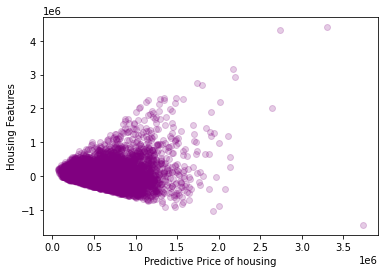

In [78]:
fig3, ax2 = plt.subplots()
ax2.set(xlabel="Predictive Price of housing",
        ylabel="Housing Features")
ax2.scatter(x=y_hat, y=y-y_hat, color="purple", alpha=0.2);

In [79]:
df_model3 = df_newnew[['crime_amount_avg','sqft_living','landmark_place_count']]

In [80]:
rows = df_model3[['crime_amount_avg', 'sqft_living','landmark_place_count']].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(3)]
vif_df["price"] = ['crime_amount','sqft_living','landmark_place_count']

vif_df

,VIF,price
0,2.205854,crime_amount
1,4.751052,sqft_living
2,4.450756,landmark_place_count


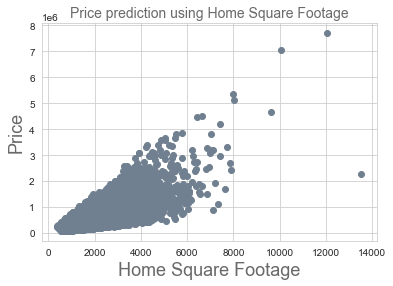

In [99]:
y= (df_newnew['price']) 
x = (df_newnew[['sqft_living']])


 
# use the scatter function
plt.scatter( x, y, color= 'slategrey')
plt.title("Price prediction using Home Square Footage", fontsize=14, fontweight=0, color='dimgrey')
plt.xlabel("Home Square Footage", fontsize=18, fontweight=0, color='dimgrey')
plt.ylabel("Price", fontsize=18, fontweight=0, color='dimgrey')

plt.show()

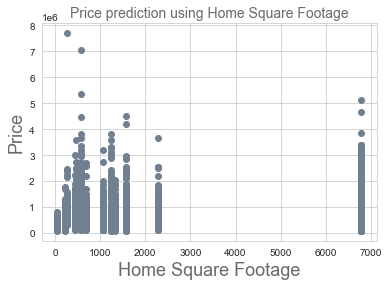

In [104]:
y= (df_newnew['price']) 
x= (df_newnew[['crime_amount_avg']])


 
# use the scatter function
plt.scatter( x, y, color= 'slategrey')
plt.title("Price prediction using Home Square Footage", fontsize=14, fontweight=0, color='dimgrey')
plt.xlabel("Home Square Footage", fontsize=18, fontweight=0, color='dimgrey')
plt.ylabel("Price", fontsize=18, fontweight=0, color='dimgrey')

plt.show()

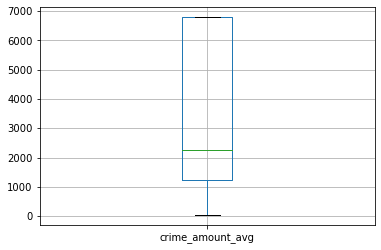

In [83]:
np.random.seed(1234)

boxplot = df_newnew.boxplot(column=['crime_amount_avg'])

<AxesSubplot:xlabel='landmark_place_count', ylabel='price'>

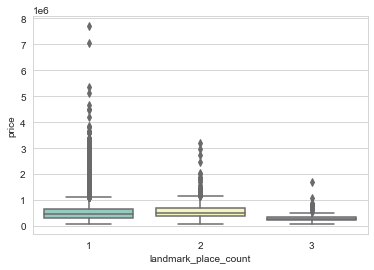

In [84]:
sns.set_style("whitegrid") 
  
sns.boxplot(x= 'landmark_place_count', y = 'price', data = df_newnew, palette="Set3") 

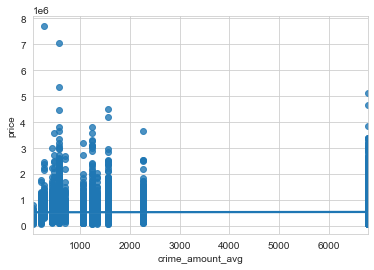

In [92]:
sns.regplot(x="crime_amount_avg", y="price", data=df_newnew);

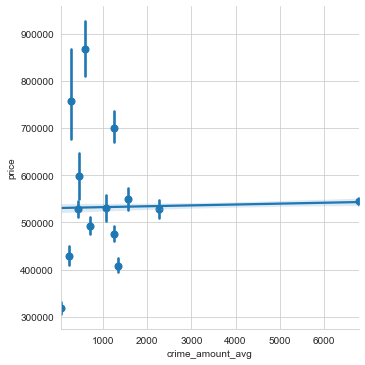

In [94]:
sns.lmplot(x="crime_amount_avg", y="price", data=df_newnew, x_estimator=np.mean);

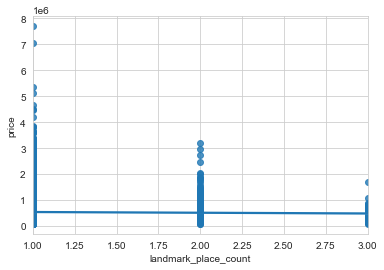

In [96]:
sns.regplot(x="landmark_place_count", y="price", data=df_newnew);

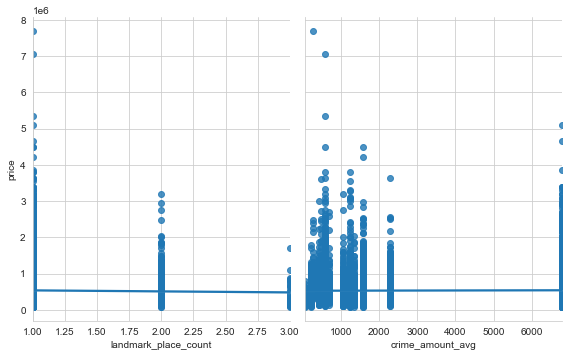

In [103]:
sns.pairplot(df_newnew, x_vars=["landmark_place_count", "crime_amount_avg"], y_vars=["price"],
             height=5, aspect=.8, kind="reg");

In [ ]:
df_newnew.plot(kind='bar',x='crime_amount_avg',y='price')

<AxesSubplot:xlabel='crime_amount_avg'>